In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nci60-cancer/NCI60.csv


In [2]:
df = pd.read_csv("/kaggle/input/nci60-cancer/NCI60.csv")

In [3]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [4]:
df.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
59,V60,-0.03,-0.48,0.07,-0.70,-0.195,4.100000e-01,-0.24,0.105,-0.41,...,-0.400019,0.15,-0.43,0.145,-0.090020,-0.02,-1.39001,-1.15,0.29,1.19
60,V61,-0.27,0.63,-0.10,1.10,1.045,8.000000e-02,-0.09,-0.675,-0.31,...,-0.560020,0.20,0.29,-0.035,0.279981,-0.16,-0.02001,-0.64,-0.37,-0.43
61,V62,0.21,-0.62,-0.15,-1.33,0.045,-4.000000e-01,-0.39,-0.675,-0.36,...,-0.160020,-0.12,0.85,-0.125,0.779980,0.39,0.00000,0.16,2.03,3.94
62,V63,-0.05,0.14,-0.09,-1.26,0.045,-2.710505e-20,0.42,-0.305,0.31,...,0.889980,-0.42,-0.46,-0.855,-0.160020,-0.35,-0.36001,-0.49,0.01,-1.72
63,V64,0.35,-0.27,0.02,-1.23,-0.715,-3.400000e-01,-0.52,0.475,0.23,...,1.629980,3.00,2.86,2.145,0.869981,0.48,0.96999,0.29,-0.15,1.21


In [5]:
first_col = df.columns[0]
df.drop([first_col], axis=1, inplace=True)

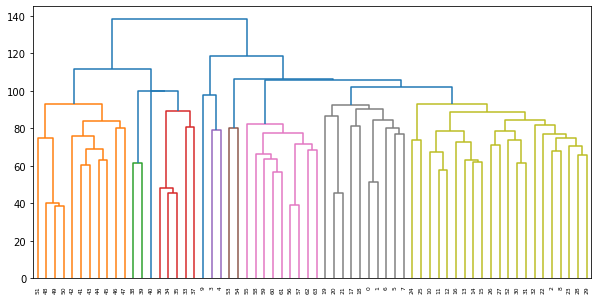

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
mergings = linkage(df, method = "complete")
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.show()

In [7]:
#Taking clusters at distance 80
labels = fcluster(mergings, 80, criterion='distance')
labels

array([20, 20, 26, 10, 10, 21, 22, 21, 26, 11, 24, 24, 24, 24, 24, 24, 24,
       18, 19, 17, 16, 16, 26, 26, 23, 23, 25, 25, 26, 26, 25, 25, 27,  7,
        6,  6,  6,  8,  5,  5,  9,  2,  2,  2,  2,  2,  3,  4,  1,  1,  1,
        1, 25, 12, 13, 15, 14, 14, 14, 14, 14, 14, 14, 14], dtype=int32)

In [8]:
df['hclusters_nopca'] = labels
df['hclusters_nopca'].nunique()

27

In [9]:
#We get 27 different clusters by applying Hierrarchichal clustering without PCA and 
#threshold 80

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
df_decomposed = pca.fit_transform(df)

In [11]:
pca50_df = pd.DataFrame(df_decomposed,columns=['PC'+str(i) for i in range(1,51)])

In [12]:
pca50_df.shape

(64, 50)

In [13]:
#We have obtained 50 features using PCA

In [14]:
sum(pca.explained_variance_ratio_*100)

95.19708446240347

In [15]:
#These 50 features contain 95% of the information in original dataset

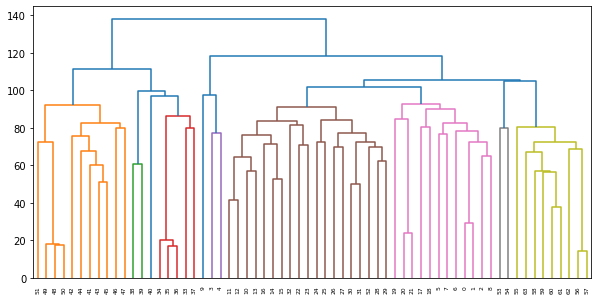

In [16]:
pca50_mergings = linkage(pca50_df, method = "complete")
plt.figure(figsize=(10,5))
dendrogram(pca50_mergings)
plt.show()

In [17]:
pca50_labels = fcluster(pca50_mergings, 80, criterion='distance')
pca50_labels

array([22, 22, 22, 10, 10, 21, 22, 21, 22, 11, 12, 12, 12, 12, 12, 12, 12,
       19, 20, 18, 17, 17, 13, 13, 15, 15, 16, 16, 16, 16, 16, 16, 14,  7,
        6,  6,  6,  8,  5,  5,  9,  2,  2,  2,  2,  2,  3,  4,  1,  1,  1,
        1, 16, 23, 23, 25, 24, 24, 24, 24, 24, 24, 24, 24], dtype=int32)

In [18]:
pca50_df['hclusters_pca50'] = pca50_labels
pca50_df['hclusters_pca50'].nunique()

25

In [19]:
#Here we can see that after PCA, we have reduced number of clusters to 25. Morover, from the 
#Dendrogram, it is clear that after PCA we can obtain higher level of clustering at lower
#thresholds itself

In [20]:
pca50_labels_threshold60 = fcluster(pca50_mergings, 60, criterion='distance')
labels_threshold60 = fcluster(mergings, 60, criterion='distance')
df['hclusters_nopca_th60'] = labels_threshold60
nx = df['hclusters_nopca_th60'].nunique()
print(f'No. of clusters Without PCA(th : 60): {nx}')
pca50_df['hclusters_pca50_th60'] = pca50_labels_threshold60
ny = pca50_df['hclusters_pca50_th60'].nunique()
print(f'No. of clusters With PCA(th : 60): {ny}')

No. of clusters Without PCA(th : 60): 55
No. of clusters With PCA(th : 60): 49
